In [2]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from collections import Counter

In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\Promo_Pricing_Combined_Data\\pricing_promo_2019_2021_campaign_sales_with_NO_dates.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Event_detailed,Event,Amount_of_Employee_pricing_percent_off,off_Particular_Item?,Amount_of_percent_Off_Particular_Item,Location_Specific?,off_1st_item?,Amount_of_percent_off_1st_item,off_conditional?,Amount_of_dollar_off_conditional,...,Wrap,dollarX_off_with_dollarY,Xpercent_on_orders_over_dollarY,dollarX_off_over_dollarY,StoreOpen,WrittenSales,Margin,Traffic,FinancedAmount,GrossWrittenSales
0,Anniversary Sale,Anniversary Sale,0,0,0,0,0,0,1,0,...,0,0,0,0,83,1607366.15,716008.37,8670.5,14346719.37,NaN
1,Anniversary Sale,Anniversary Sale,0,0,0,0,0,0,0,0,...,0,0,0,0,115,937083.51,419880.93,6079.0,9833126.17,NaN


In [5]:
data = data.drop(["Event_detailed", "Event"], axis = 1)
data

,Amount_of_Employee_pricing_percent_off,off_Particular_Item?,Amount_of_percent_Off_Particular_Item,Location_Specific?,off_1st_item?,Amount_of_percent_off_1st_item,off_conditional?,Amount_of_dollar_off_conditional,Amount_of_percent_off_conditional,off_HomeStore_Specials?,...,Wrap,dollarX_off_with_dollarY,Xpercent_on_orders_over_dollarY,dollarX_off_over_dollarY,StoreOpen,WrittenSales,Margin,Traffic,FinancedAmount,GrossWrittenSales
0,0,0,0,0,0,0,1,0,25,0,...,0,0,0,0,83,1607366.15,716008.37,8670.5,14346719.37,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,115,937083.51,419880.93,6079.0,9833126.17,NaN
2,0,0,0,0,1,40,1,0,40,0,...,0,0,0,0,86,2218800.94,1048347.13,9561.5,16902311.04,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,115,982785.83,455653.17,7402.0,18281016.48,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29,974771.21,460666.48,2494.0,6064197.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,88,860898.82,419782.02,5039.5,12495296.69,1128910.85
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,148,3003384.68,1513783.00,12173.5,26327190.78,3303973.83
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,263,5021356.98,2402049.94,19536.0,62348450.27,5732028.20
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,94,5881379.59,2814172.13,15140.5,38915036.23,6153971.07


In [6]:
data.isna().sum().sum()

40

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 82 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Amount_of_Employee_pricing_percent_off                           219 non-null    int64  
 1   off_Particular_Item?                                             219 non-null    int64  
 2   Amount_of_percent_Off_Particular_Item                            219 non-null    int64  
 3   Location_Specific?                                               219 non-null    int64  
 4   off_1st_item?                                                    219 non-null    int64  
 5   Amount_of_percent_off_1st_item                                   219 non-null    int64  
 6   off_conditional?                                                 219 non-null    int64  
 7   Amount_of_dollar_off_conditional            

In [8]:
feature = "Traffic"
# print(data[feature])

<AxesSubplot:>

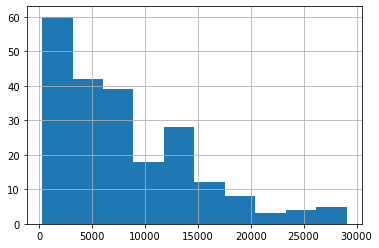

In [9]:
data["Traffic"].hist()

[  242.219  3149.1    6027.2    8905.3   11783.4   14661.5   17539.6
 20417.7   23295.8   26173.9   29052.   ]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3, 4, 1, 2, 6, 7, 5, 8, 9, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


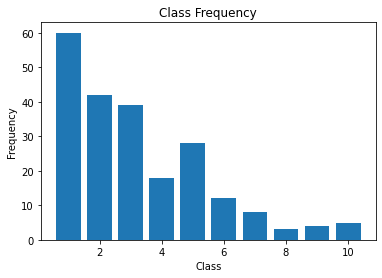

In [11]:
def create_target_class(feature,num_bins):
    result, bins = pd.cut(
    data[feature], 
    bins=num_bins,            # A single number value
    retbins=True)
    
    print(bins)
    
    names = list(range(1,num_bins+1))
    print(names)
    
    data["Range"] = pd.cut(data[feature], bins, labels=names)
    data["Range"] = pd.Categorical(data["Range"]) 
    print(data["Range"].unique())
    
    unique, counts = np.unique(data["Range"], return_counts=True)
    plt.bar(unique, counts)

    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    plt.show()

feature = "Traffic"
n = 10
create_target_class(feature,n)

# Train - Test Split

In [14]:
y = data.Range.astype(int).values

X = data.drop(["WrittenSales","Margin","Traffic","FinancedAmount","StoreOpen","Range"],axis=1).values

X_df = data.drop(["WrittenSales","Margin","Traffic","FinancedAmount","StoreOpen","Range"],axis=1)

In [15]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (153, 76)
Number transactions y_train dataset:  (153, 1)
Number transactions X_test dataset:  (66, 76)
Number transactions y_test dataset:  (66, 1)


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [18]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [19]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

In [20]:
data[feature].max(),data["Range"].max()

(29052.0, 10)

## Applying PCA

In [21]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Grid Search - Imbalance

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [51]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification with LogisticRegression() to predict Traffic
 3 nn score: 0.24242424242424243 
Parameters for LogisticRegression(): dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.21505376 0.21526882        nan 0.24731183 0.24731183        nan
        nan 0.25505376        nan 0.22924731 0.26795699 0.26795699
 0.22860215 0.26795699 0.26795699        nan        nan        nan
        nan        nan 0.21505376 0.21526882        nan 0.24731183
 0.24731183        nan        nan 0.27462366        nan 0.27462366
 0.25462366 0.25462366 0

Best parameters {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


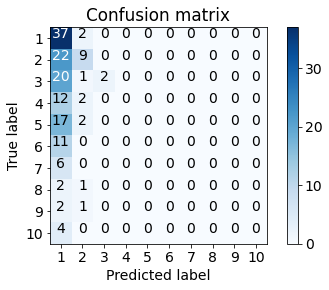

C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.28      0.95      0.43        39
           2       0.50      0.29      0.37        31
           3       1.00      0.09      0.16        23
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4

    accuracy                           0.31       153
   macro avg       0.18      0.13      0.10       153
weighted avg       0.32      0.31      0.21       153



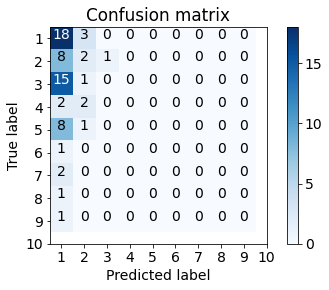

              precision    recall  f1-score   support

           1       0.32      0.86      0.47        21
           2       0.22      0.18      0.20        11
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.30        66
   macro avg       0.06      0.12      0.07        66
weighted avg       0.14      0.30      0.18        66

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
def implement_classification(classifier, X_trainset, X_testset, y_trainset, y_testset):
    clfr = classifier
    print(f"Classification with {classifier} to predict {feature}")
    clfr.fit(X_trainset, y_trainset) 
    prediction = clfr.predict(X_testset)
    print(" {} nn score: {} ".format(3,clfr.score(X_testset, y_testset))) #OR 
    # print(" {} nn score: {} ".format(3,accuracy_score(y_testset, prediction))) 
    print("====================================================")
    print(f"Parameters for {clfr}: {clfr.get_params().keys()}")
    
    if str(clfr) == "DecisionTreeClassifier()":
        param_dict = {
        "criterion":['gini','entropy'],
        "max_depth":range(1,10),
        "min_samples_split":range(1,10),
        "min_samples_leaf":range(1,5)
#         "max_features": range(1,len(X_df.columns)) # n_features_selected 
        }
    elif str(clfr) == "RandomForestClassifier()":
        param_dict = {
        "criterion":['gini','entropy'],
        "max_depth":range(1,5),
        "min_samples_split":range(1,5),
        "min_samples_leaf":range(1,5)
#         "max_features": range(1,len(X_df.columns)) # n_features_selected
        }
    elif str(clfr) == "LogisticRegression()":
        param_dict = {
        'C': [10**-2,10**-1,10**0,10**1,10**2],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
        "penalty": ['none', 'l1', 'l2', 'elasticnet']
        }
        
    print("====================================================")
            
    clf = GridSearchCV(clfr, 
                   param_grid = param_dict,
                   cv=5, verbose=5, n_jobs=3)
    clf.fit(X_trainset, y_trainset.ravel())
    print("====================================================")
    print(f"Best parameters {clf.best_params_}")  
    print("====================================================")
    
    clf_ = LogisticRegression(**clf.best_params_) #dt1 = DecisionTreeClassifier(**clf.best_params_)

    clf_.fit(X_trainset, y_trainset.ravel())
    
    y_train_pre = clf_.predict(X_trainset)

    cnf_matrix_tra = confusion_matrix(y_trainset, y_train_pre)
    class_names = [str(x) for x in list(range(1,n+1))]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
    plt.show()
    print(classification_report(y_trainset, clf_.predict(X_trainset)))
    
    y_pre = clf_.predict(X_testset)

    cnf_matrix = confusion_matrix(y_testset, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [str(x) for x in list(range(1,n+1))]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
    plt.show()
    
    print(classification_report(y_testset, clf_.predict(X_testset)))
    print("====================================================")
    
    print(clf_.coef_[0])
   
#     importances = pd.DataFrame({'feature':X_df.columns,'importance':np.round(clf_.feature_importances_,3)})
#     importances = importances.sort_values('importance',ascending=False)
#     print(importances)
#     print("====================================================")
#     # Set default font size
#     plt.rcParams['font.size'] = 14
#     plt.figure(figsize = (20,5))
#     sns.set_palette('mako')
#     plt.xticks(rotation = 90)
#     plt.title('Feature correlation')
#     sns.barplot (data = importances, x = "feature", y = 'importance');

     
    
c = LogisticRegression()
implement_classification(c, X_train, X_test, y_train, y_test)

In [74]:
clf_.coef_[0]
clf_.intercept_[0]

NameError: name 'clf_' is not defined

In [ ]:
# Set default font size
from sklearn import tree

plt.rcParams['font.size'] = 50
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dt1, 
                   feature_names=data.columns,
                   class_names=str(list(range(1,11))),
                   filled=True)

In [ ]:
# fig.savefig("decision_tree.png")